In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
dataset = pd.read_csv('lstm_so2.csv')
dataset = dataset.fillna(dataset.mean())
data = dataset.values
data = data.astype('float32')

In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [4]:
# Split data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [5]:
# Create function to create LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [6]:
# Reshape input data to be 3-dimensional
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))

In [7]:
# Create and fit the LSTM model
model = create_model()
model.fit(X_train, train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1039/1039 - 3s - loss: 0.0027 - 3s/epoch - 2ms/step
Epoch 2/100
1039/1039 - 1s - loss: 1.2512e-04 - 1s/epoch - 1ms/step
Epoch 3/100
1039/1039 - 2s - loss: 1.0510e-04 - 2s/epoch - 1ms/step
Epoch 4/100
1039/1039 - 2s - loss: 1.0661e-04 - 2s/epoch - 1ms/step
Epoch 5/100
1039/1039 - 1s - loss: 1.0523e-04 - 1s/epoch - 1ms/step
Epoch 6/100
1039/1039 - 1s - loss: 8.6206e-05 - 1s/epoch - 1ms/step
Epoch 7/100
1039/1039 - 1s - loss: 8.1251e-05 - 1s/epoch - 1ms/step
Epoch 8/100
1039/1039 - 1s - loss: 9.1561e-05 - 1s/epoch - 1ms/step
Epoch 9/100
1039/1039 - 1s - loss: 9.9534e-05 - 1s/epoch - 1ms/step
Epoch 10/100
1039/1039 - 1s - loss: 9.0074e-05 - 1s/epoch - 1ms/step
Epoch 11/100
1039/1039 - 1s - loss: 8.1143e-05 - 1s/epoch - 1ms/step
Epoch 12/100
1039/1039 - 1s - loss: 8.8313e-05 - 1s/epoch - 1ms/step
Epoch 13/100
1039/1039 - 1s - loss: 8.8726e-05 - 1s/epoch - 1ms/step
Epoch 14/100
1039/1039 - 1s - loss: 7.8853e-05 - 1s/epoch - 1ms/step
Epoch 15/100
1039/1039 - 1s - loss: 6.2980e-05 

In [8]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [9]:
train_predict = scaler.inverse_transform(train_predict)
train = scaler.inverse_transform(train)
test_predict = scaler.inverse_transform(test_predict)
test = scaler.inverse_transform(test)

In [10]:
train_rmse = np.sqrt(np.mean(np.power((train - train_predict), 2)))
test_rmse = np.sqrt(np.mean(np.power((test - test_predict), 2)))
print('Train RMSE: %.2f' % train_rmse)
print('Test RMSE: %.2f' % test_rmse)

Train RMSE: 1.70
Test RMSE: 2.02


In [11]:
df=pd.DataFrame({'Actual':train.tolist(),'Predicted from lstm':train_predict.tolist()})
df.to_excel('lstm_SO2.xlsx')
df

,Actual,Predicted from lstm
0,[27.93000030517578],[25.790206909179688]
1,[27.559999465942383],[25.44278335571289]
2,[29.290000915527344],[27.067468643188477]
3,[26.279998779296875],[24.24114990234375]
4,[24.489999771118164],[22.561458587646484]
...,...,...
1034,[9.869999885559082],[8.887730598449707]
1035,[9.140000343322754],[8.207724571228027]
1036,[8.170000076293945],[7.3046441078186035]
1037,[9.960000038146973],[8.971588134765625]


In [12]:
df=pd.DataFrame({'Actual':test.tolist(),'Predicted from lstm':test_predict.tolist()})
df.to_excel('lstm_SO2_test.xlsx')
df

,Actual,Predicted from lstm
0,[5.21999979019165],[4.561785697937012]
1,[2.559999942779541],[2.0935463905334473]
2,[6.449999809265137],[5.704738616943359]
3,[7.5],[6.681204319000244]
4,[9.960000038146973],[8.971588134765625]
...,...,...
507,[10.969999313354492],[9.912980079650879]
508,[16.223995208740234],[14.818816184997559]
509,[16.223995208740234],[14.818816184997559]
510,[16.223995208740234],[14.818816184997559]


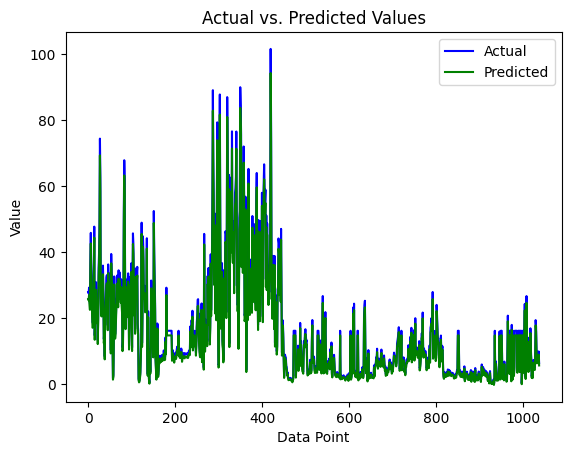

In [13]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(train))

# plot actual values as a blue line
plt.plot(x_values, train, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, train_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

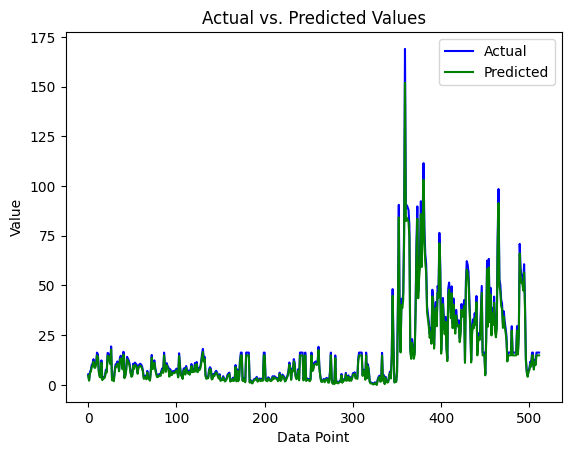

In [14]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(test))

# plot actual values as a blue line
plt.plot(x_values, test, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, test_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()